In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
#Data Loading

file_name = 'india_city_lat_long.csv'
col_names = ['city', 'lat', 'long']
df = read_csv(file_name, names=col_names)
df

,city,lat,long
0,Nanjangud,12.120000,76.680000
1,Chittorgarh,24.879999,74.629997
2,Ratnagiri,16.994444,73.300003
3,Goregaon,19.155001,72.849998
4,Pindwara,24.794500,73.055000
...,...,...,...
789,Gaya,24.780010,84.981827
790,Unjha City,23.804337,72.393677
791,Nalasopara,19.432278,72.774300
792,Kolkata,22.572645,88.363892


In [3]:
# Check for null/NA
dfnull = pd.DataFrame(df.count())
dfnull.columns = ['Non_NA_Rows']
dfnull['NA_Rows'] = df.shape[0] - dfnull.Non_NA_Rows
dfnull['Total_Rows'] = df.shape[0]
dfnull

,Non_NA_Rows,NA_Rows,Total_Rows
city,794,0,794
lat,794,0,794
long,794,0,794


Text(0, 0.5, 'Latitude')

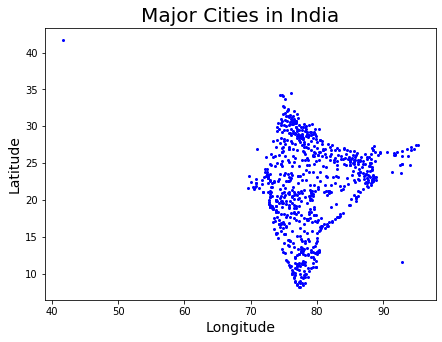

In [4]:
# Data Visualization
df.plot(kind='scatter', x='long', y='lat', color = 'blue', s=4, figsize=(7,5))
plt.title('Major Cities in India', size=20)
plt.xlabel('Longitude', size=14)
plt.ylabel('Latitude', size=14)

In [5]:
# Data Cleaning
#Why city(s) outside india ? 

df.query('lat > 40 | (lat < 15 & long > 90)')

#52	Port Blair	11.623377	92.726486
#55	Batumi	41.643414	41.639900

#Batumi is not a city in india, should be removed from dataset
#Port Blair - Ok, no need to delete

,city,lat,long
52,Port Blair,11.623377,92.726486
55,Batumi,41.643414,41.639900


Text(0, 0.5, 'Latitude')

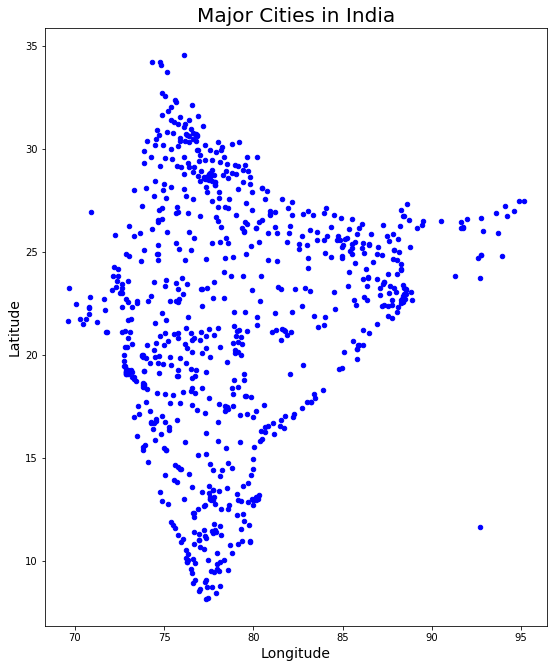

In [6]:
#Remove the Batumi city from the dataset
df = df.query('city != "Batumi"')

#Plot the cities
df.plot(kind='scatter', x='long', y='lat', color = 'blue', figsize=(9,11))
plt.title('Major Cities in India', size=20)
plt.xlabel('Longitude', size=14)
plt.ylabel('Latitude', size=14)

In [7]:
#Input - latitude and longitude values from the dataset
inputx = df.iloc[:, [1,2]].values
inputx

array([[12.12    , 76.68    ],
       [24.879999, 74.629997],
       [16.994444, 73.300003],
       ...,
       [19.432278, 72.7743  ],
       [22.572645, 88.363892],
       [28.984644, 77.705956]])

In [8]:
#No of Clusters=2

kmeans3 = KMeans(n_clusters=2)
print('Kmeans Parameters:')
print(kmeans3)
print()

y_kmeans3 = kmeans3.fit_predict(inputx)
print('Clustered values:')
print(y_kmeans3)
print()

print('Centroid(s): [Latitude, Longitude]')
print(kmeans3.cluster_centers_)

Kmeans Parameters:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Clustered values:
[0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0
 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1
 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1
 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 0 1 1 0 0 

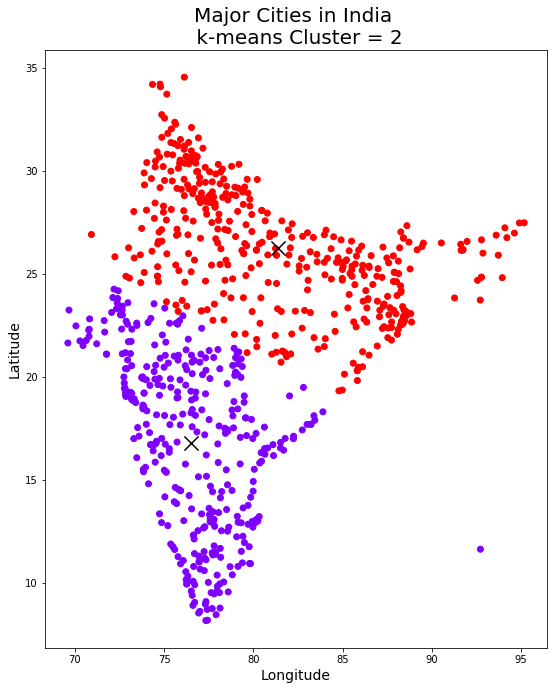

In [9]:
plt.figure(figsize=(9,11))

#Plot the cities (.), clusters (colour) 
plt.scatter(x=inputx[:,1], y=inputx[:,0], c=y_kmeans3, cmap='rainbow')  

#Plot the centroids (x) 
plt.scatter(x=kmeans3.cluster_centers_[:,1], y=kmeans3.cluster_centers_[:,0], marker='x', color = 'black', s=200) 

plt.title('Major Cities in India \n k-means Cluster = 2', size=20, loc='center')
plt.xlabel('Longitude', size=14)
plt.ylabel('Latitude', size=14)
plt.show()

Kmeans Parameters:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Clustered values:
[2 3 0 0 0 1 0 3 3 0 2 1 1 3 0 0 2 2 2 0 2 2 2 2 1 1 1 0 3 1 0 1 2 1 0 2 2
 2 0 1 2 1 3 1 0 3 1 1 1 0 3 1 1 1 0 1 3 2 2 0 1 2 2 2 0 2 0 1 3 0 0 3 1 1
 0 0 2 1 0 2 1 3 3 3 1 0 1 0 1 1 1 2 3 3 2 2 2 2 2 1 1 1 1 1 2 1 2 1 1 0 1
 0 3 1 1 3 2 1 0 1 1 2 0 3 2 0 2 3 3 1 3 0 0 3 1 1 3 0 1 2 1 2 0 3 1 0 3 1
 3 1 0 1 1 0 1 1 1 3 0 1 3 0 0 2 2 1 0 0 3 1 1 3 0 2 3 3 3 2 3 0 2 0 2 1 0
 0 1 1 1 3 3 3 1 0 1 3 2 1 1 1 3 3 2 3 3 1 2 0 1 3 2 1 2 3 1 3 2 0 1 0 3 0
 3 2 1 2 3 0 1 0 3 2 0 1 0 2 1 1 2 3 1 0 1 1 1 1 0 2 0 3 1 3 3 3 1 3 1 1 3
 0 3 3 1 1 1 1 2 2 2 2 1 1 3 2 2 3 2 3 0 2 1 0 0 0 3 1 2 3 0 3 3 2 2 3 2 1
 2 3 3 2 3 0 1 3 2 0 3 2 1 2 1 2 3 3 0 1 3 3 1 0 0 0 1 0 1 0 3 1 0 3 1 0 0
 0 1 3 0 1 1 1 0 3 2 0 0 0 0 0 0 1 1 0 1 2 1 1 0 2 3 3 3 3 2 2 2 2 0 2 0 1
 1 2 3 3 2 3 0 0 0 

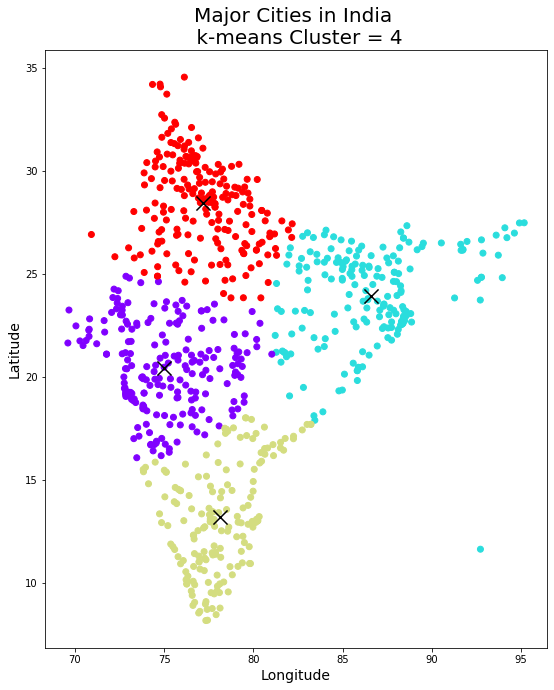

In [10]:
#No of Clusters = 4
kmeans3 = KMeans(n_clusters=4)
print('Kmeans Parameters:')
print(kmeans3)
print()

y_kmeans3 = kmeans3.fit_predict(inputx)
print('Clustered values:')
print(y_kmeans3)
print()

print('Centroid(s): [Latitude, Longitude]')
print(kmeans3.cluster_centers_)

#Plot the cities
plt.figure(figsize=(9,11))
plt.scatter(x=inputx[:,1], y=inputx[:,0], c=y_kmeans3, cmap='rainbow')  
plt.scatter(x=kmeans3.cluster_centers_[:,1], y=kmeans3.cluster_centers_[:,0], marker='x', color = 'black', s=200) 

plt.title('Major Cities in India \n k-means Cluster = 4', size=20, loc='center')
plt.xlabel('Longitude', size=14)
plt.ylabel('Latitude', size=14)
plt.show()

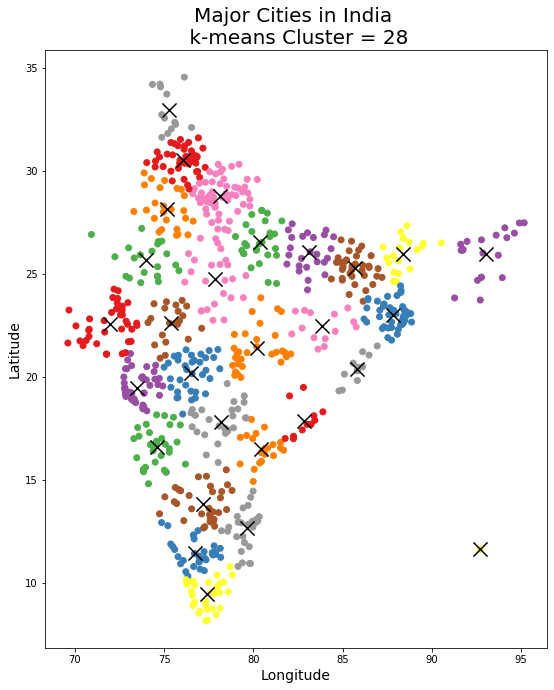

In [11]:
#No of Clusters = 28
kmeans3 = KMeans(n_clusters=28)
y_kmeans3 = kmeans3.fit_predict(inputx)

#Plot the cities. Couldn't find colour set for 28 clusters, so few colors are repeated.
plt.figure(figsize=(9,11))
plt.scatter(x=inputx[:,1], y=inputx[:,0], c=y_kmeans3, cmap='Set1')  
plt.scatter(x=kmeans3.cluster_centers_[:,1], y=kmeans3.cluster_centers_[:,0], marker='x', color = 'black', s=200) 

plt.title('Major Cities in India \n k-means Cluster = 28', size=20, loc='center')
plt.xlabel('Longitude', size=14)
plt.ylabel('Latitude', size=14)
plt.show()